In [24]:
#pip install selenium
#pip install selenium

from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show
from bokeh.palettes import d3
from bokeh.palettes import Category20

def save_html_to_file(html_content, filename):
    with open(filename, "w", encoding="utf-8") as file:
        file.write(html_content)
    print("Page content has been saved to", filename)

def extract_books_data(soup):
    amazon_books = []
    for book in soup.find_all('div', class_='p13n-sc-uncoverable-faceout'):
        title = book.find('div', class_='_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y').text
        author1 = book.select_one('div.a-row span.a-size-small').text
        author2 = book.select_one('div.a-row a.a-size-small').text if book.select_one('div.a-row a.a-size-small') else 'null'

        rating = book.select_one('span.a-icon-alt').text if book.select_one('span.a-icon-alt') else 'null'
        customers_rated = book.select_one('a.a-link-normal span.a-size-small').text if book.select_one('a.a-link-normal span.a-size-small') else 'null'
        author = author2 if author1 == customers_rated else author1
        price = book.find('span', class_='_cDEzb_p13n-sc-price_3mJ9Z').text
        amazon_books.append([title, author, rating, customers_rated, price])
    return amazon_books

def write_books_to_csv(books_data, filename):
    with open(filename, "w", newline='', encoding="utf-8") as csvfile:
        csvwriter = csv.writer(csvfile)
        csvwriter.writerow(['Book_Name', 'Author', 'Rating', 'Customers_Rated', 'Price'])
        csvwriter.writerows(books_data)
    print("Book data has been saved to", filename)

def main():
    # URL of the amazon_book
    url = "https://www.amazon.in/gp/bestsellers/books/ref=zg_bs_pg_"

    # Set up Chrome options to run the browser in incognito mode
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument("--incognito")

    # Initialize the Chrome driver with the specified options
    driver = webdriver.Chrome(options=chrome_options)

    # Navigate to the amazon_book URL
    driver.get(url)

    # Wait for the page to load (adjust the wait time according to your webpage)
    driver.implicitly_wait(10)

    # Get the HTML content of the page after it has fully loaded
    html_content = driver.page_source

    # Parse the HTML content with BeautifulSoup
    soup = BeautifulSoup(html_content, 'html.parser')

    # Save the HTML content to a text file for reference
    save_html_to_file(str(soup), "amazon_books.csv")

    # Extract amazon_book from the parsed HTML
    amazon_books_data = extract_books_data(soup)

    # Write amazon_book data to a CSV file
    write_books_to_csv(amazon_books_data, "amazon_books.csv")

    # Create a Pandas DataFrame from the collected amazon_book
    df = pd.DataFrame(amazon_books_data, columns=['Book_Name','Author','Rating','Customers_Rated','Price'])

    # Write the DataFrame to a CSV file
    df.to_csv("amazon_books.csv", index=False)

    # Display the resulting DataFrame
    print(df)

    # Close the Chrome driver
    driver.quit()

if __name__ == "__main__":
    main()


Page content has been saved to amazon_books.csv
Book data has been saved to amazon_books.csv
                                            Book_Name  \
0                                     RAM C/O ANANDHI   
1   Atomic Habits: The life-changing million copy ...   
2   Mathematics class 10th and MCQs - by R.D. Shar...   
3                                       AATUJEEVITHAM   
4   BUYERSTOPS Interact in English Main Course Boo...   
5   My First Library: Boxset of 10 Board Books for...   
6   Arihant NTA CUET UG Exam Guide For Section 3 G...   
7   PW NTA NEET Rankers Test Series - 2024 Based o...   
8   Oswaal NTA CUET (UG)| Question Bank Chapterwis...   
9   Lucent General Knowledge - New Reduced Price E...   
10                            The Psychology of Money   
11  Interact in English Literature + Main Course B...   
12  Ettavum priyappetta ennod - novel by Nimna Vij...   
13  Indian Polity for UPSC (English)|7th Edition|C...   
14  Secondary School Mathematics for Class 9 - CBS..

In [16]:
# Read the CSV file
df = pd.read_csv("amazon_books.csv")

# Extract numeric part from 'Rating' column
df['Rating'] = df['Rating'].str.split().str[0]

# Replace 'null' values with NaN
df['Rating'] = df['Rating'].replace('null', np.nan)

# Display the DataFrame
print(df)

                                            Book_Name  \
0                                     RAM C/O ANANDHI   
1   Atomic Habits: The life-changing million copy ...   
2   Mathematics class 10th and MCQs - by R.D. Shar...   
3                                       AATUJEEVITHAM   
4   BUYERSTOPS Interact in English Main Course Boo...   
5   My First Library: Boxset of 10 Board Books for...   
6   Arihant NTA CUET UG Exam Guide For Section 3 G...   
7   PW NTA NEET Rankers Test Series - 2024 Based o...   
8   Oswaal NTA CUET (UG)| Question Bank Chapterwis...   
9   Lucent General Knowledge - New Reduced Price E...   
10                            The Psychology of Money   
11  Interact in English Literature + Main Course B...   
12  Ettavum priyappetta ennod - novel by Nimna Vij...   
13  Indian Polity for UPSC (English)|7th Edition|C...   
14  Secondary School Mathematics for Class 9 - CBS...   
15  The Power of Your Subconscious Mind: Original ...   
16                             

In [17]:
# Convert 'Customers_Rated' to numeric, replacing 'null' with NaN, removing commas, and converting to Int64
df['Customers_Rated'] = pd.to_numeric(df['Customers_Rated'].replace('null', np.nan).str.replace(',', ''), errors='coerce').astype('Int64')

# Display the DataFrame
print(df)

                                            Book_Name  \
0                                     RAM C/O ANANDHI   
1   Atomic Habits: The life-changing million copy ...   
2   Mathematics class 10th and MCQs - by R.D. Shar...   
3                                       AATUJEEVITHAM   
4   BUYERSTOPS Interact in English Main Course Boo...   
5   My First Library: Boxset of 10 Board Books for...   
6   Arihant NTA CUET UG Exam Guide For Section 3 G...   
7   PW NTA NEET Rankers Test Series - 2024 Based o...   
8   Oswaal NTA CUET (UG)| Question Bank Chapterwis...   
9   Lucent General Knowledge - New Reduced Price E...   
10                            The Psychology of Money   
11  Interact in English Literature + Main Course B...   
12  Ettavum priyappetta ennod - novel by Nimna Vij...   
13  Indian Polity for UPSC (English)|7th Edition|C...   
14  Secondary School Mathematics for Class 9 - CBS...   
15  The Power of Your Subconscious Mind: Original ...   
16                             

In [18]:
# Replace '₹' with an empty string and convert to float, filling NaN values with 0
df['Price'] = pd.to_numeric(df['Price'].str.replace('₹', '', regex=False), errors='coerce').fillna(0)

# Display the DataFrame
print(df)

                                            Book_Name  \
0                                     RAM C/O ANANDHI   
1   Atomic Habits: The life-changing million copy ...   
2   Mathematics class 10th and MCQs - by R.D. Shar...   
3                                       AATUJEEVITHAM   
4   BUYERSTOPS Interact in English Main Course Boo...   
5   My First Library: Boxset of 10 Board Books for...   
6   Arihant NTA CUET UG Exam Guide For Section 3 G...   
7   PW NTA NEET Rankers Test Series - 2024 Based o...   
8   Oswaal NTA CUET (UG)| Question Bank Chapterwis...   
9   Lucent General Knowledge - New Reduced Price E...   
10                            The Psychology of Money   
11  Interact in English Literature + Main Course B...   
12  Ettavum priyappetta ennod - novel by Nimna Vij...   
13  Indian Polity for UPSC (English)|7th Edition|C...   
14  Secondary School Mathematics for Class 9 - CBS...   
15  The Power of Your Subconscious Mind: Original ...   
16                             

In [19]:
# Find the highest priced book for each author, sort by price in descending order, and select top 25
highest_priced_books = df.groupby('Author').agg({'Price': 'max'}).reset_index().nlargest(25, 'Price')

# Display the result
print(highest_priced_books)

                                               Author  Price
19                                    RAJ ENTERPRISES  787.0
11                                       M Laxmikanth  670.0
21                                        Seep Pahuja  659.0
16                             Oswaal Editorial Board  537.0
8                                         James Clear  509.0
22                      Veena Aggarwal, R S; Aggarwal  499.0
3                                          BUYERSTOPS  499.0
17                                                 PW  487.0
18                                        R.D. Sharma  460.0
23                                 Wonder House Books  399.0
6                                    Dr. Shiv K Sarin  359.0
7                                   Francesc Miralles  358.0
0                                   AKHIL P DHARMAJAN  355.0
14                                        Nimna Vijay  325.0
13                                      Morgan Housel  275.0
12                      

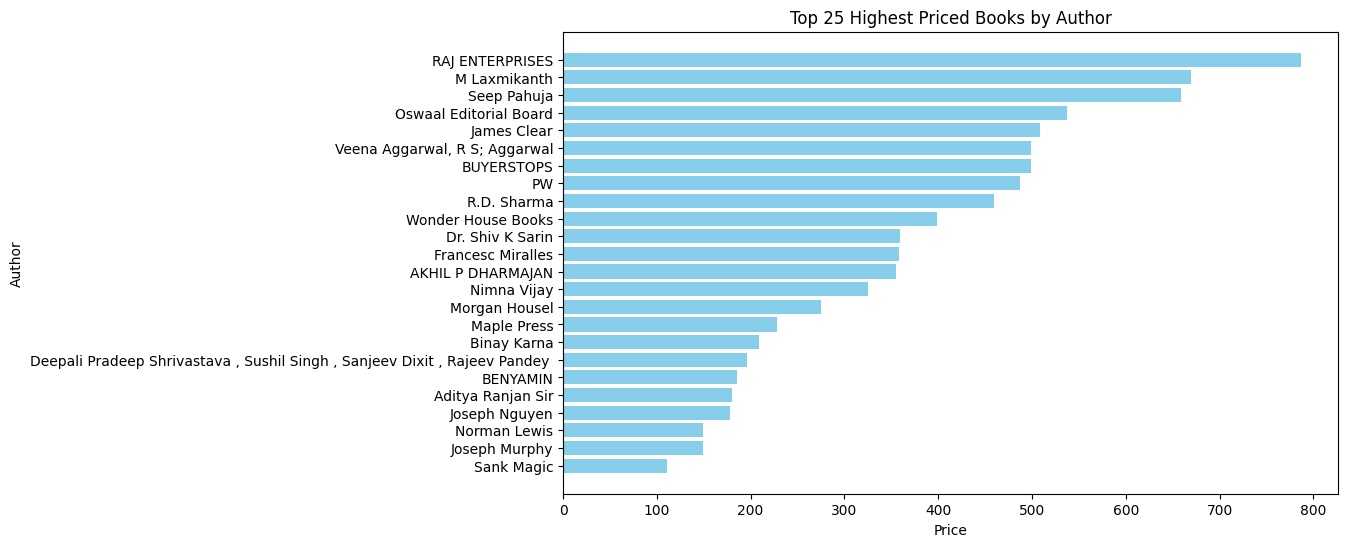

In [20]:
# Plotting
plt.figure(figsize=(10, 6))
plt.barh(highest_priced_books['Author'], highest_priced_books['Price'], color='skyblue')
plt.xlabel('Price')
plt.ylabel('Author')
plt.title('Top 25 Highest Priced Books by Author')
plt.gca().invert_yaxis()  # Invert y-axis to display highest price at the top
plt.show()

In [21]:
# Convert 'Rating' to float and find top rated books and authors based on rating
top_rated_books_authors = (
    df.assign(Rating=df['Rating'].astype(float))  # Convert 'Rating' to float
      .sort_values(by='Rating', ascending=False)  # Sort by rating in descending order
      .head(25)                                    # Select top 25 rated books and authors
      [['Book_Name', 'Author', 'Rating']]          # Select specific columns for display
)

# Display the result
print(top_rated_books_authors)

                                            Book_Name  \
19  Oswaal CUET (UG) Question Bank Chapter-wise an...   
3                                       AATUJEEVITHAM   
0                                     RAM C/O ANANDHI   
13  Indian Polity for UPSC (English)|7th Edition|C...   
20         Own Your Body: A Doctor's Life-saving Tips   
10                            The Psychology of Money   
16                                             Ikigai   
1   Atomic Habits: The life-changing million copy ...   
28  BRAHMASTRA Complete Maths Multicolored Formula...   
25  Moral Story Books for Kids (Illustrated) - Eng...   
24  Coloring Books Box Set: Pack of 12 Copy Color ...   
21       Don't Believe Everything You Think (English)   
17  Animals Tales From Panchtantra: Timeless Stori...   
15  The Power of Your Subconscious Mind: Original ...   
12  Ettavum priyappetta ennod - novel by Nimna Vij...   
11  Interact in English Literature + Main Course B...   
9   Lucent General Knowledge - 

In [22]:
# Find top customer rated authors and books
top_customer_rated = (
    df.sort_values(by='Customers_Rated', ascending=False)  # Sort by 'Customers_Rated' in descending order
      .head(15)                                             # Select top 15 customer rated authors and books
)

# Display the result
print(top_customer_rated)

                                            Book_Name  \
1   Atomic Habits: The life-changing million copy ...   
5   My First Library: Boxset of 10 Board Books for...   
15  The Power of Your Subconscious Mind: Original ...   
10                            The Psychology of Money   
16                                             Ikigai   
18  My First Book of Patterns Pencil Control: Patt...   
29  Brain Activity Book for Kids - 200+ Activities...   
17  Animals Tales From Panchtantra: Timeless Stori...   
21       Don't Believe Everything You Think (English)   
24  Coloring Books Box Set: Pack of 12 Copy Color ...   
3                                       AATUJEEVITHAM   
14  Secondary School Mathematics for Class 9 - CBS...   
27  Word Power Made Easy By Norman Lewis (More tha...   
25  Moral Story Books for Kids (Illustrated) - Eng...   
22  MINtile Sank Magic Practice Copybook, (4 Book ...   

                           Author Rating  Customers_Rated  Price  
1                   

In [25]:
# Find top customer rated authors and books
top_customer_rated_unique = (
    df.sort_values(by='Customers_Rated', ascending=False)  # Sort by 'Customers_Rated' in descending order
      .head(15)                                             # Select top 15 customer rated authors and books
      .drop_duplicates(subset=['Author'])                   # Remove duplicate rows based on 'Author' column
)

# Create the plot
palette = Category20[15]  # Using Category20 palette for coloring bars
p = figure(x_range=top_customer_rated_unique['Author'], title='Top 15 Customer Rated Authors and Books',
           toolbar_location=None, tools='')
p.vbar(x=top_customer_rated_unique['Author'], top=top_customer_rated_unique['Customers_Rated'], width=0.9, color=palette)
p.xaxis.major_label_orientation = 1.2
p.yaxis.axis_label = 'Customers Rated'

# Show the plot
show(p)